In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_excel('Dataset_w6.xlsx')

In [11]:
data

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050.0,31977.0,11068.9,118.0,16324.0
192,Viet Nam,South-easternAsia,330967.0,95541.0,2067.9,136.0,174111.0
193,Yemen,WesternAsia,527968.0,28250.0,1106.4,136.0,6861.0
194,Zambia,EasternAfrica,752612.0,17094.0,1311.1,179.0,7442.0


In [92]:
data.isnull().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

# 1. Find out how many countries are there in the dataset

In [93]:
country=data.country.unique()
num=country.size
print(num)

196


# 2. Examining the data by using visualizations

Text(0, 0.5, 'Population in thousands (2017)')

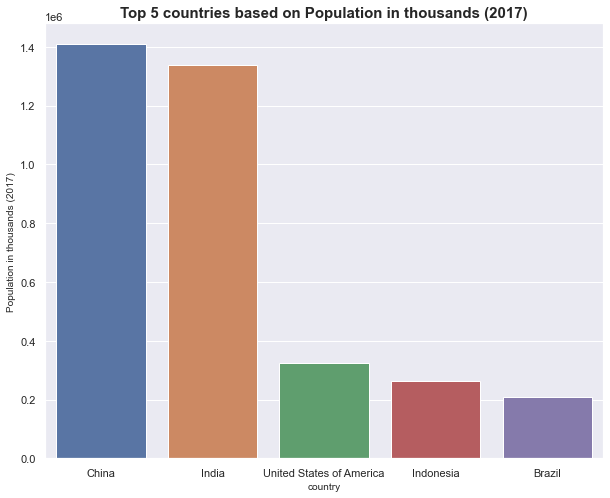

In [86]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.barplot(x="country",y="Population in thousands (2017)" ,data=data.sort_values("Population in thousands (2017)",ascending=False)
.head(5))
plt.title('Top 5 countries based on Population in thousands (2017)',fontweight='bold',fontsize=15)
plt.xlabel('country',fontsize=10)
plt.ylabel('Population in thousands (2017)',fontsize=10)

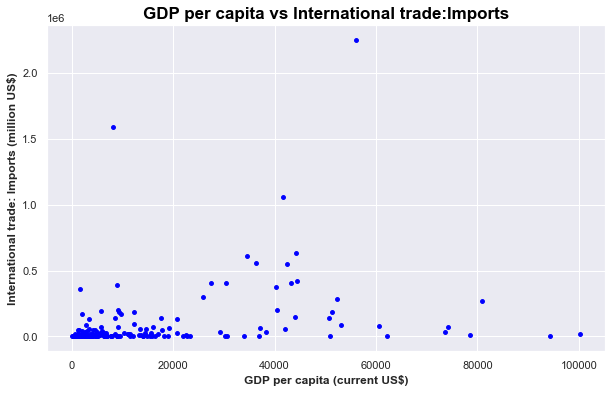

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(data['GDP per capita (current US$)'], data['International trade: Imports (million US$)'], s=15, color='blue')
plt.title('GDP per capita vs International trade:Imports', fontweight='bold', color='black', fontsize=17)
plt.xlabel('GDP per capita (current US$)', fontweight='bold')
plt.ylabel('International trade: Imports (million US$)', fontweight='bold')
plt.show()

Text(0, 0.5, 'International trade: Imports (million US$)')

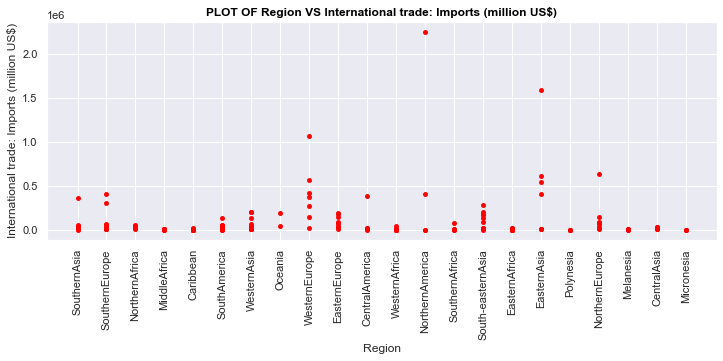

In [119]:
plt.figure(figsize=(12,4))
plt.scatter(data['Region'],data['International trade: Imports (million US$)'],s=15,color='red')
plt.title('PLOT OF Region VS International trade: Imports (million US$)',fontweight='bold',color='black')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('International trade: Imports (million US$)')

<AxesSubplot:xlabel='Surface area (km2)', ylabel='Region'>

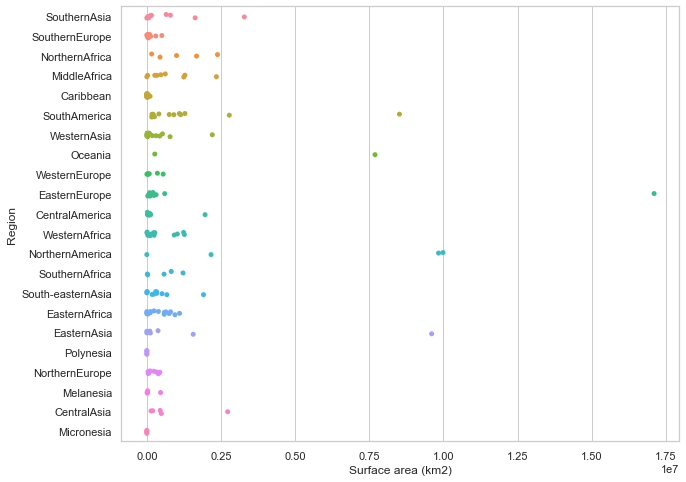

In [158]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,8))
sns.stripplot(y=data["Region"],x=data["Surface area (km2)"])

# 3. Find out how many countries with respect to the region are available in the region

In [97]:
data.groupby('Region')[['country']].count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


# 4. On average which region has the highest

# a. GDP per capita (current US$)

In [126]:
GDP=data.groupby('Region')[['GDP per capita (current US$)']].mean()
GDP.nlargest(1, 'GDP per capita (current US$)')

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.0


# b. International trade: Imports (million US$)

In [127]:
trade=data.groupby('Region')[['International trade: Imports (million US$)']].mean().round(3)
trade.nlargest(1, 'International trade: Imports (million US$)')

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.25


# 5.Find out which region has more consistent with respect to GDP per capita(current US$)

In [156]:
stnd=data.groupby("Region")[["GDP per capita (current US$)"]].std()
stnd.nsmallest(1,"GDP per capita (current US$)")

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399
